In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted


In [7]:
#historical_join_db = pd.read_excel('./resource/historical_join_db3_new.xlsx')
historical_join_db = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_join_db.xlsx', keep_default_na=False)
historical_join_db

Databases Primary Model Second Model  Model  Activiti  \
0                       Aerospike     Key-value  Multi-model  NoSQL         0   
1                        ArangoDB   Multi-Model               NoSQL         0   
2                       Cassandra   Wide column               NoSQL         0   
3                      ClickHouse    Relational  Multi-model    SQL         0   
4                       Couchbase      Document  Multi-model  NoSQL         0   
5                         CouchDB      Document  Multi-model  NoSQL         0   
6                        DynamoDB   Multi-model               NoSQL         0   
7                            Etcd     Key-value               NoSQL         0   
8                       FileMaker    Relational                 SQL         0   
9               Firebase Realtime      Document               NoSQL         0   
10                       Firebird    Relational                 SQL         0   
11         Google Cloud Datastore      Document               NoSQL         0   
12           GoogleCloudFilestore      Document               NoSQL         0   
13                             H2    Relational  Multi-model    SQL        55   
14                      Hazelcast     Key-value  Multi-model  NoSQL         3   
15                          HBase   Wide column               NoSQL         0   
16                       HyperSQL    Relational                 SQL        13   
17                        IBM_DB2    Relational  Multi-model    SQL        31   
18                         Impala    Relational  Multi-model    SQL         0   
19                      Influx DB   Time Series  Multi-model  NoSQL         0   
20                       Informix    Relational  Multi-model    SQL         0   
21                         Ingres    Relational                 SQL         0   
22                      Interbase    Relational                 SQL         0   
23                           Kdb+   Time Series               NoSQL         0   
24                 MySQL_Maria DB    Relational  Multi-model    SQL        45   
25                      MarkLogic   Multi-model               NoSQL         0   
26       Microsoft Azure CosmosDB   Multi-model               NoSQL         0   
27  Microsoft Azure Table Storage   Wide column               NoSQL         0   
28                        MongoDB      Document  Multi-model  NoSQL         0   
29                      MS_Access    Relational   Relational    SQL         0   
30                          Neo4j         Graph               NoSQL         0   
31                         Oracle    Relational  Multi-model    SQL        40   
32                        PostGIS  Spatial DBMS  Multi-model  NoSQL         0   
33        PostgreSQL_ CockroachDB    Relational  Multi-model    SQL        44   
34                          Realm      Document               NoSQL         0   
35                          Redis     Key-value  Multi-model  NoSQL         0   
36                        Riak KV     Key-value               NoSQL         0   
37            SAP Adaptive Server    Relational  Multi-model    SQL        32   
38                    Singlestore    Relational                 SQL         0   
39               SAP SQL Anywhere    Relational                 SQL        32   
40                      Snowflake    Relational                 SQL         0   
41                         SQLite    Relational                 SQL         0   
42                       Teradata    Relational  Multi-model    SQL         0   
43                        Vertica    Relational  Multi-model    SQL         0   

    Android-IMSI-Catcher-Detector  AndroidUtilCode  AntennaPod  \
0                               0                0           0   
1                               0                0           0   
2                               0                0           0   
3                               0                0           0   
4                               0               

In [8]:
result_databases_models = historical_join_db
result_databases_models

Databases Primary Model Second Model  Model  Activiti  \
0                       Aerospike     Key-value  Multi-model  NoSQL         0   
1                        ArangoDB   Multi-Model               NoSQL         0   
2                       Cassandra   Wide column               NoSQL         0   
3                      ClickHouse    Relational  Multi-model    SQL         0   
4                       Couchbase      Document  Multi-model  NoSQL         0   
5                         CouchDB      Document  Multi-model  NoSQL         0   
6                        DynamoDB   Multi-model               NoSQL         0   
7                            Etcd     Key-value               NoSQL         0   
8                       FileMaker    Relational                 SQL         0   
9               Firebase Realtime      Document               NoSQL         0   
10                       Firebird    Relational                 SQL         0   
11         Google Cloud Datastore      Document               NoSQL         0   
12           GoogleCloudFilestore      Document               NoSQL         0   
13                             H2    Relational  Multi-model    SQL        55   
14                      Hazelcast     Key-value  Multi-model  NoSQL         3   
15                          HBase   Wide column               NoSQL         0   
16                       HyperSQL    Relational                 SQL        13   
17                        IBM_DB2    Relational  Multi-model    SQL        31   
18                         Impala    Relational  Multi-model    SQL         0   
19                      Influx DB   Time Series  Multi-model  NoSQL         0   
20                       Informix    Relational  Multi-model    SQL         0   
21                         Ingres    Relational                 SQL         0   
22                      Interbase    Relational                 SQL         0   
23                           Kdb+   Time Series               NoSQL         0   
24                 MySQL_Maria DB    Relational  Multi-model    SQL        45   
25                      MarkLogic   Multi-model               NoSQL         0   
26       Microsoft Azure CosmosDB   Multi-model               NoSQL         0   
27  Microsoft Azure Table Storage   Wide column               NoSQL         0   
28                        MongoDB      Document  Multi-model  NoSQL         0   
29                      MS_Access    Relational   Relational    SQL         0   
30                          Neo4j         Graph               NoSQL         0   
31                         Oracle    Relational  Multi-model    SQL        40   
32                        PostGIS  Spatial DBMS  Multi-model  NoSQL         0   
33        PostgreSQL_ CockroachDB    Relational  Multi-model    SQL        44   
34                          Realm      Document               NoSQL         0   
35                          Redis     Key-value  Multi-model  NoSQL         0   
36                        Riak KV     Key-value               NoSQL         0   
37            SAP Adaptive Server    Relational  Multi-model    SQL        32   
38                    Singlestore    Relational                 SQL         0   
39               SAP SQL Anywhere    Relational                 SQL        32   
40                      Snowflake    Relational                 SQL         0   
41                         SQLite    Relational                 SQL         0   
42                       Teradata    Relational  Multi-model    SQL         0   
43                        Vertica    Relational  Multi-model    SQL         0   

    Android-IMSI-Catcher-Detector  AndroidUtilCode  AntennaPod  \
0                               0                0           0   
1                               0                0           0   
2                               0                0           0   
3                               0                0           0   
4                               0               

In [9]:
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
#organizing_per_model = organizing_per_model.drop('Projects', axis = 0)
organizing_per_model

Model                          NoSQL    SQL
Activiti                        True   True
Android-IMSI-Catcher-Detector   True  False
AndroidUtilCode                False  False
AntennaPod                     False  False
AnySoftKeyboard                False   True
...                              ...    ...
zeppelin                        True   True
zipkin                          True   True
zookeeper                      False   True
zxing                          False  False
zxing-android-embedded         False  False

[361 rows x 2 columns]

In [10]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [11]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Multi-Model'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'NoSQL'

models_of_database_per_project['Model'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)


models_of_database_per_project[models_of_database_per_project['Model'].isnull()]
models_of_database_per_project.dropna(subset=['Model'], inplace= True)
models_of_database_per_project.to_excel('modelsTeste.xlsx')

In [12]:
#annotated_java = pd.read_excel('./resources/annotated_java.xlsx')
annotated_java = pd.read_excel(RESOURCE_DIR + os.sep + 'annotated_java.xlsx', keep_default_na=False)
characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on= 'Projects', right_on='name')
characterization_of_projects.drop(characterization_of_projects.index[33], inplace= True)
characterization_of_projects

Projects    SQL  NoSQL        Model  \
0                         Activiti   True   True  Multi-Model   
1    Android-IMSI-Catcher-Detector  False   True        NoSQL   
2                  AnySoftKeyboard   True  False   Relational   
3                       AsciidocFX   True   True  Multi-Model   
4                    AxonFramework   True   True  Multi-Model   
..                             ...    ...    ...          ...   
228             yacy_search_server   True   True  Multi-Model   
229                        zaproxy   True  False   Relational   
230                       zeppelin   True   True  Multi-Model   
231                         zipkin   True   True  Multi-Model   
232                      zookeeper   True  False   Relational   

               owner                           name           createdAt  \
0           Activiti                       Activiti 2012-09-13 11:34:43   
1    CellularPrivacy  Android-IMSI-Catcher-Detector 2013-11-23 10:04:14   
2    AnySoftKeyboard                AnySoftKeyboard 2012-04-18 12:38:01   
3         asciidocfx                     AsciidocFX 2014-05-18 17:49:13   
4      AxonFramework                  AxonFramework 2011-12-02 16:04:42   
..               ...                            ...                 ...   
228             yacy             yacy_search_server 2015-03-22 12:54:20   
229          zaproxy                        zaproxy 2015-06-03 16:55:01   
230           apache                       zeppelin 2015-03-25 07:00:06   
231       openzipkin                         zipkin 2012-06-06 18:26:16   
232           apache                      zookeeper 2009-03-27 15:41:56   

               pushedAt  isMirror  diskUsage  ... commits  pullRequests  \
0   2019-08-23 12:02:11     False      95935  ...    8458          1411   
1   2019-08-13 15:22:57     False      10897  ...    2583           344   
2   2019-08-21 16:43:46     False     131594  ...    4558           556   
3   2019-08-05 22:55:08     False     145073  ...    1566            53   
4   2019-08-16 09:58:53     False      29173  ...    5359           512   
..                  ...       ...        ...  ...     ...           ...   
228 2019-07-17 07:36:46     False     742164  ...   13922            92   
229 2019-08-22 07:24:00     False     181083  ...    6980          2103   
230 2019-08-23 08:18:53      True      75180  ...    4154          3429   
231 2019-08-23 11:36:31     False      48583  ...    2134          1728   
232 2019-08-23 10:16:05      True     113380  ...    1973          1055   

     branches  tags  releases  \
0          74   263        23   
1           6    49        48   
2          15    93        41   
3          29    73        73   
4          15   101        62   
..        ...   ...       ...   
228         1    20         0   
229         3   227       124   
230        11    15         0   
231        41   184        53   
232        16   104         0   

                                                   url  \
0              http://www.github.com/Activiti/Activiti   
1    http://www.github.com/CellularPrivacy/Android-...   
2    http://www.github.com/AnySoftKeyboard/AnySoftK...   
3          http://www.github.com/asciidocfx/AsciidocFX   
4    http://www.github.com/AxonFramework/AxonFramework   
..                                                 ...   
228      http://www.github.com/yacy/yacy_search_server   
229              http://www.github.com/zaproxy/zaproxy   
230              http://www.github.com/apache/zeppelin   
231            http://www.github.com/openzipkin/zipkin   
232             http://www.github.com/apache/zookeeper   

                                           description  isSoftware  \
0    Activiti is a light-weight workflow and Busine...           Y   
1    AIMSICD • Fight IMSI-Catcher, StingRay and sil...           Y   
2    Android (f/w 2.1+) on screen keyboard for mult...           Y   
3    Asciidoc Editor and Toolchain written with Jav...           Y   

In [13]:
characterization_of_projects['domain'].value_counts()

Data Management                 59
Software Development            52
Infrastructure Management       26
Security                        14
Program Analysis                12
Automation                      11
Monitoring                      11
Network                          8
Enterprise Resource Planning     7
Collaboration                    6
Game                             5
Artificial Intelligence          5
Media                            4
Other                            3
File Management                  2
Cryptocurrency                   2
Finances                         1
Personal Management              1
                                 1
Artificial Intelligence          1
infrastructure Management        1
Name: domain, dtype: int64

Text(0.5, 1.0, 'Mean languages for each database model')

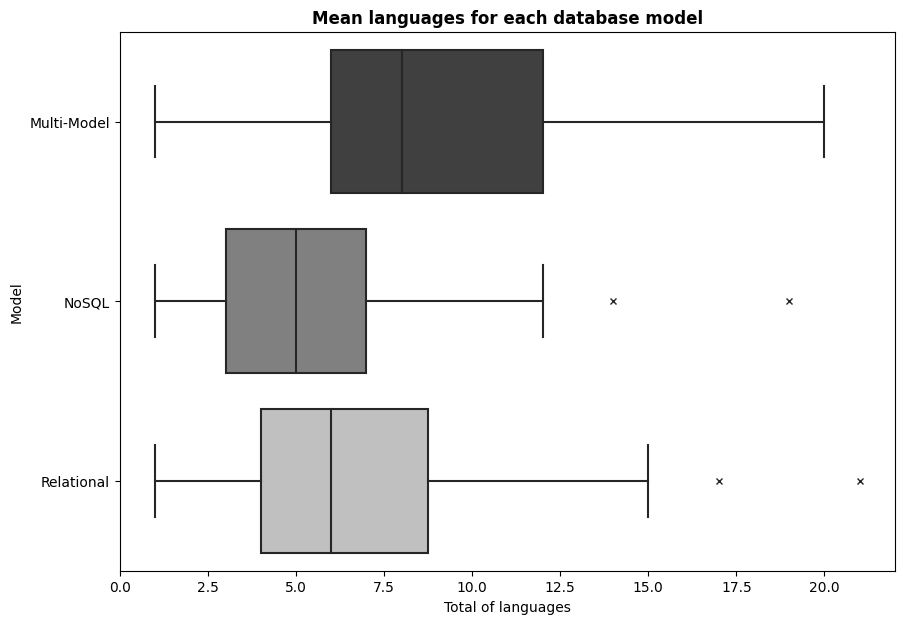

In [14]:
plt.figure(figsize=(10,7))
languages = characterization_of_projects[['Projects', 'Model', 'languages']]
valor = languages['languages']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
languages = languages[interval]
languages_graph = sns.boxplot(data=languages, x = "languages", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
languages_graph.set_xlabel('Total of languages')
languages_graph.set_title('Mean languages for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean diskUsage for each database model')

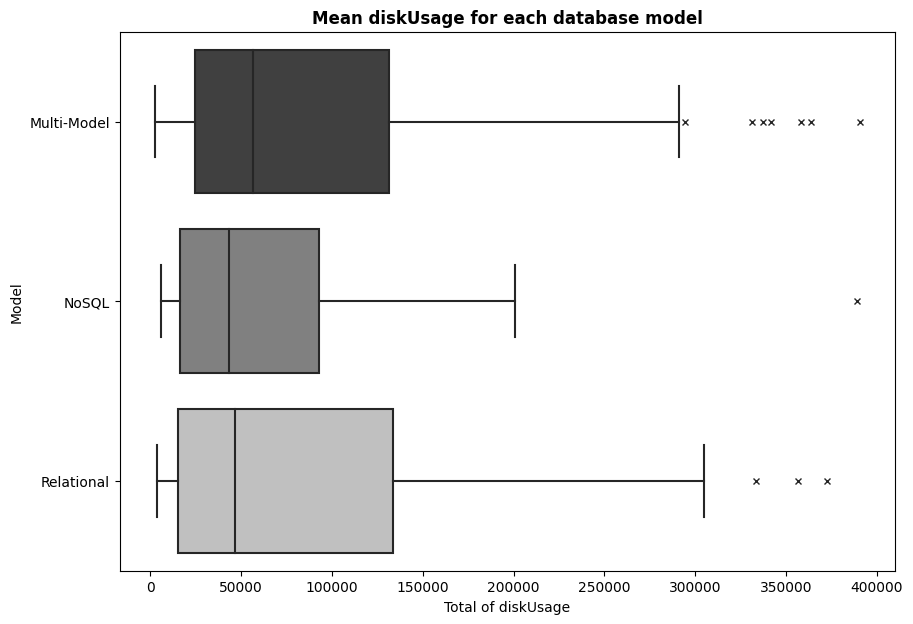

In [15]:
plt.figure(figsize=(10,7))
diskUsage = characterization_of_projects[['Projects', 'Model', 'diskUsage']]
valor = diskUsage['diskUsage']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
diskUsage = diskUsage[interval]
diskUsage_graph = sns.boxplot(data=diskUsage, x = "diskUsage", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
diskUsage_graph.set_xlabel('Total of diskUsage')
diskUsage_graph.set_title('Mean diskUsage for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean contributors for each database model')

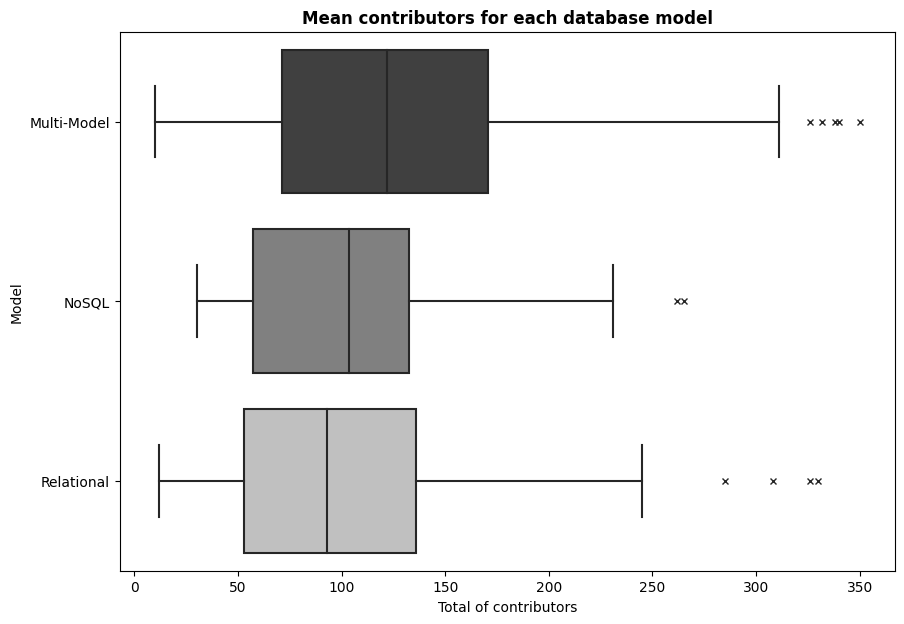

In [16]:
plt.figure(figsize=(10,7))
contributors = characterization_of_projects[['Projects', 'Model', 'contributors']]
valor = contributors['contributors']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
contributors = contributors[interval]
contributors_graph = sns.boxplot(data=contributors, x = "contributors", y = "Model", palette = 'gray',flierprops = {'marker': 'x'})
contributors_graph.set_xlabel('Total of contributors')
contributors_graph.set_title('Mean contributors for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean stars for each database model')

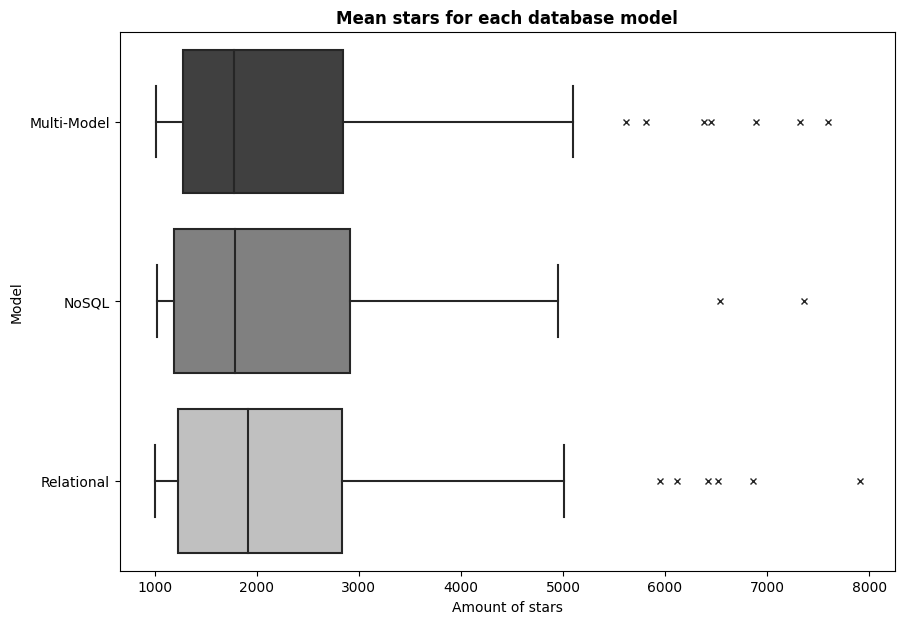

In [17]:
plt.figure(figsize=(10,7))
stars = characterization_of_projects[['Projects', 'Model', 'stargazers']]
valor = stars['stargazers']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
stars = stars[interval]
stars_graph = sns.boxplot(data = stars, x = "stargazers", y = "Model", palette='gray', flierprops = {'marker': 'x'})
stars_graph.set_xlabel('Amount of stars')
stars_graph.set_title('Mean stars for each database model', fontweight = 'bold')

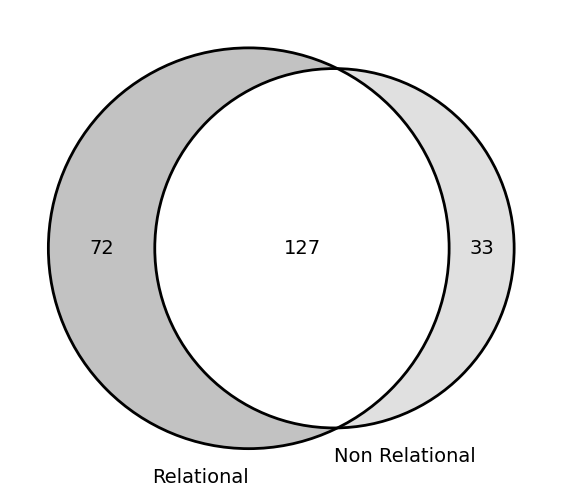

In [18]:
plt.figure(figsize=(7,7))
count_of_models = characterization_of_projects['Model'].value_counts()
A = count_of_models['Relational']
B = count_of_models['NoSQL']
AB = count_of_models['Multi-Model']

venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))

for text in venn.set_labels:  #change label size
 text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
 text.set_fontsize(14)

plt.savefig(IMAGES_DIR+"/fig10.pdf", format="pdf", bbox_inches="tight")
#plt.title("Venn diagram to represent the adoption of data models in projects", fontweight = 'bold', fontsize = '15')

In [19]:
projects_with_db_relational = characterization_of_projects['Model'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Model'] == 'NoSQL'
projects_with_db_multimodel = characterization_of_projects['Model'] == "Multi-Model"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

In [20]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})

index  amount
0           Software Development      23
1                Data Management      15
2               Program Analysis       6
3                       Security       4
4      Infrastructure Management       4
5   Enterprise Resource Planning       3
6                           Game       3
7                     Automation       3
8                          Media       2
9       Artificial Intelligence        2
10                    Monitoring       2
11                         Other       1
12       Artificial Intelligence       1
13                                     1
14                Cryptocurrency       1
15                 Collaboration       1

In [21]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})

index  amount
0       Software Development       9
1  Infrastructure Management       6
2            Data Management       6
3                   Security       3
4                    Network       2
5                      Other       2
6                 Monitoring       2
7                 Automation       1
8           Program Analysis       1
9   Artificial Intelligence        1

In [22]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})

index  amount
0                Data Management      38
1           Software Development      20
2      Infrastructure Management      16
3                     Automation       7
4                     Monitoring       7
5                       Security       7
6                        Network       6
7                  Collaboration       5
8               Program Analysis       5
9   Enterprise Resource Planning       4
10                         Media       2
11               File Management       2
12                          Game       2
13      Artificial Intelligence        2
14                Cryptocurrency       1
15           Personal Management       1
16                      Finances       1
17     infrastructure Management       1

In [23]:
M = {'infrastructure management': 21,
 'software development': 16,
 'hpc': 9,
 'monitoring': 9,
 'program analysis': 6,
 'media': 5,
 'automation': 5,
 'security': 5,
 'communication': 5,
 'machine learning': 3,
 'game': 3,
 'network': 3,
 'collaboration': 2,
 'file management': 2,
 'erp': 2,
 'cryptocurrency': 1,
 'e-commerce': 1,
 'application container': 1}

NR = {'software development': 8,
 'media': 5,
 'communication': 5,
 'monitoring': 4,
 'infrastructure management': 4,
 'network': 3,
 'machine learning': 3,
 'automation': 3,
 'scm': 2,
 'application container': 2,
 'game': 1,
 'gestão pessoal': 1, #
 'collaboration': 1,
 'program analysis': 1,
 'hpc': 1}

In [24]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['NoSQL'] = 'NaN'
table['Multi-Model'] = ''
table

domain  Relational NoSQL Multi-Model
0           Software Development        23.0   NaN            
1                Data Management        15.0   NaN            
2               Program Analysis         6.0   NaN            
3                       Security         4.0   NaN            
4      Infrastructure Management         4.0   NaN            
5   Enterprise Resource Planning         3.0   NaN            
6                           Game         3.0   NaN            
7                     Automation         3.0   NaN            
8                          Media         2.0   NaN            
9       Artificial Intelligence          2.0   NaN            
10                    Monitoring         2.0   NaN            
11                         Other         1.0   NaN            
12       Artificial Intelligence         1.0   NaN            
13                                       1.0   NaN            
14                Cryptocurrency         1.0   NaN            
15                 Collaboration         1.0   NaN            
16                       Network         NaN   NaN            
17               File Management         NaN   NaN            
18           Personal Management         NaN   NaN            
19                      Finances         NaN   NaN            
20     infrastructure Management         NaN   NaN

In [25]:
table['NoSQL'] = table['domain'].map(NR)
table['Multi-Model'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'NoSQL': 'int', 'Multi-Model': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table

Domain  Relational  NoSQL  Multi-Model
0           Software Development          23      0            0
1                Data Management          15      0            0
2               Program Analysis           6      0            0
3                       Security           4      0            0
4      Infrastructure Management           4      0            0
5   Enterprise Resource Planning           3      0            0
6                           Game           3      0            0
7                     Automation           3      0            0
8                          Media           2      0            0
9       Artificial Intelligence            2      0            0
10                    Monitoring           2      0            0
11                         Other           1      0            0
12       Artificial Intelligence           1      0            0
13                                         1      0            0
14                Cryptocurrency           1      0            0
15                 Collaboration           1      0            0
16                       Network           0      0            0
17               File Management           0      0            0
18           Personal Management           0      0            0
19                      Finances           0      0            0
20     infrastructure Management           0      0            0

In [26]:
multi_model = pd.DataFrame(data = table)
multi_model['Single-Model'] = multi_model['Relational'] + multi_model['NoSQL']
multi_model['Sum'] = multi_model['Single-Model'] + multi_model['Multi-Model']
del multi_model['Relational']
del multi_model['NoSQL']
multi_model['Multi-Model'] = multi_model['Multi-Model'] / multi_model['Sum']
multi_model['Single-Model'] = multi_model['Single-Model'] / multi_model['Sum']
del multi_model['Sum']
most_frequentsMS = pd.DataFrame(data = multi_model)
multi_model

Domain  Multi-Model  Single-Model
0           Software Development          0.0           1.0
1                Data Management          0.0           1.0
2               Program Analysis          0.0           1.0
3                       Security          0.0           1.0
4      Infrastructure Management          0.0           1.0
5   Enterprise Resource Planning          0.0           1.0
6                           Game          0.0           1.0
7                     Automation          0.0           1.0
8                          Media          0.0           1.0
9       Artificial Intelligence           0.0           1.0
10                    Monitoring          0.0           1.0
11                         Other          0.0           1.0
12       Artificial Intelligence          0.0           1.0
13                                        0.0           1.0
14                Cryptocurrency          0.0           1.0
15                 Collaboration          0.0           1.0
16                       Network          NaN           NaN
17               File Management          NaN           NaN
18           Personal Management          NaN           NaN
19                      Finances          NaN           NaN
20     infrastructure Management          NaN           NaN

In [27]:
#most_frequentsMS = multi_model.loc['0', '2', '1', '9', '7']
most_frequentsMS = most_frequentsMS.loc[0:9]
most_frequentsMS = most_frequentsMS.drop([3, 4, 5, 6, 8], axis = 0)
most_frequentsMS

Domain  Multi-Model  Single-Model
0      Software Development          0.0           1.0
1           Data Management          0.0           1.0
2          Program Analysis          0.0           1.0
7                Automation          0.0           1.0
9  Artificial Intelligence           0.0           1.0

Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

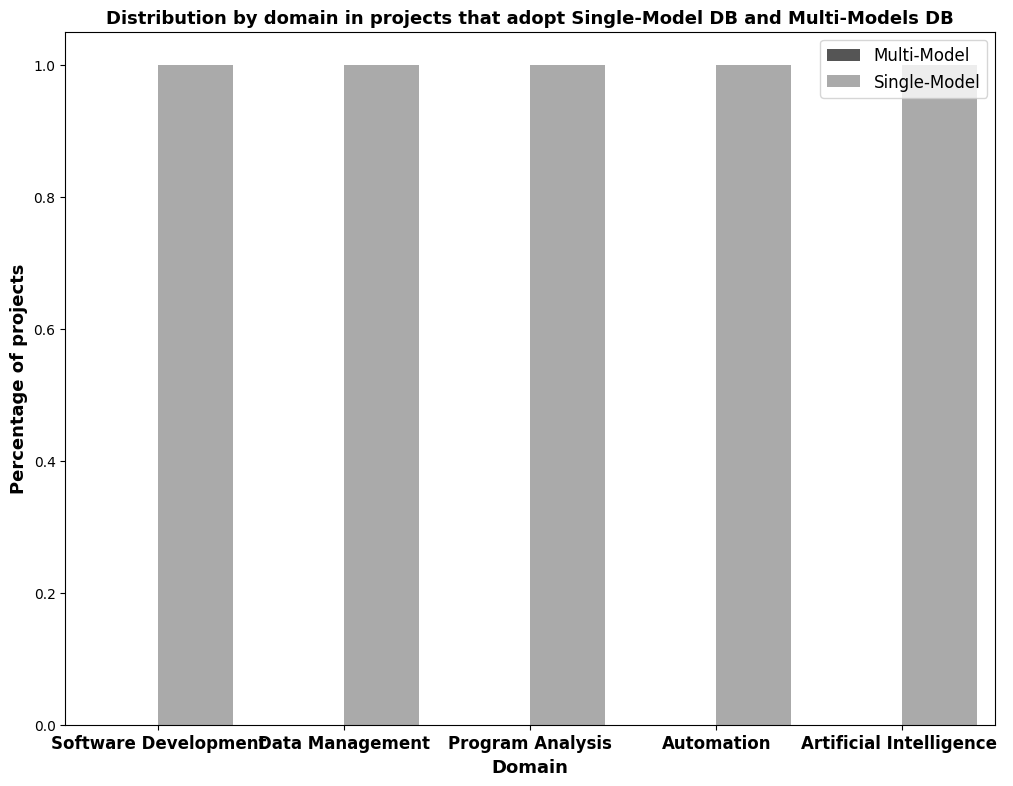

In [28]:
fig = plt.figure(figsize= (12, 9))
graph_most_frequentsMS = sns.barplot(data= most_frequentsMS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsMS.set_xticklabels(most_frequentsMS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsMS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.legend(fontsize = 12)
graph_most_frequentsMS.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

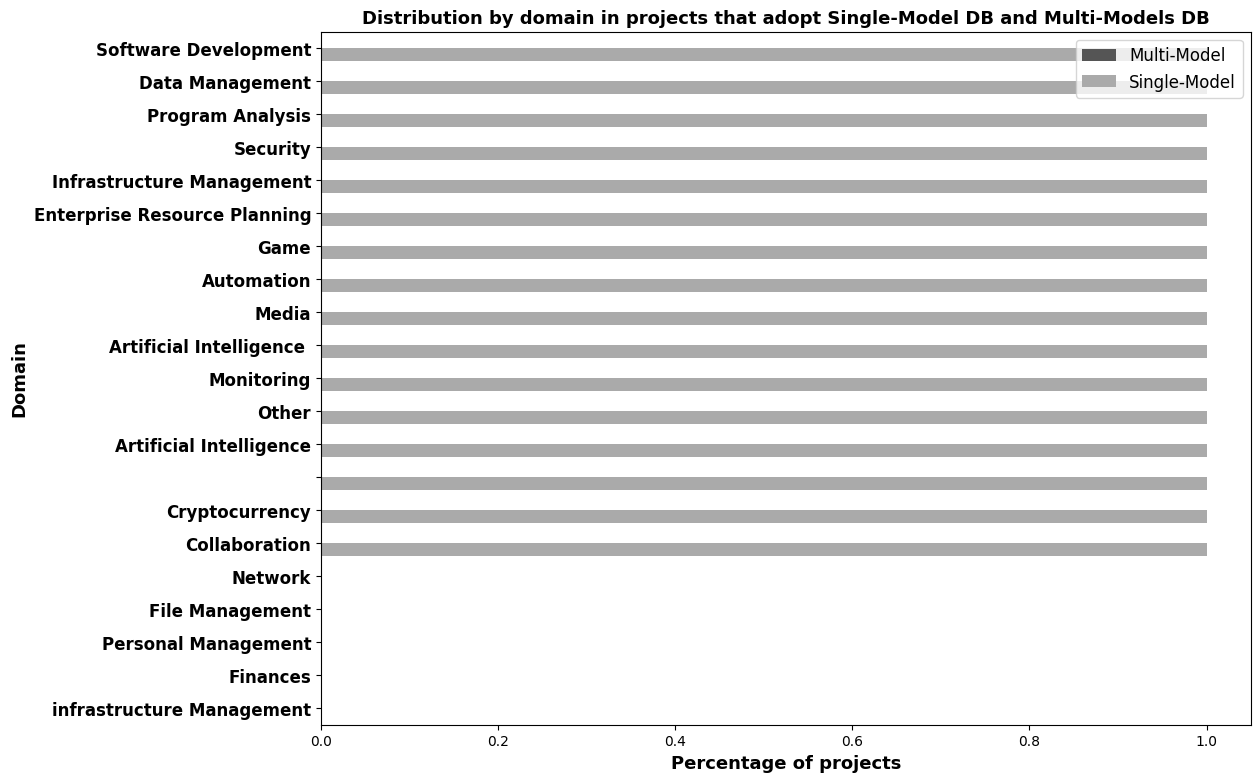

In [29]:
fig = plt.figure(figsize= (12, 9))
graph_multi_model = sns.barplot(data= multi_model.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_multi_model.set_yticklabels(multi_model['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_multi_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_multi_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_multi_model.legend(fontsize = 12)
graph_multi_model.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

In [30]:
soma = table.loc[:].eval('Sum = Relational + NoSQL')
single_model = soma.loc[:].eval('Relational = Relational / Sum')
single_model = single_model.loc[:].eval('NoSQL = NoSQL / Sum')
del single_model['Single-Model']
del single_model['Multi-Model']
del single_model['Sum']
most_frequentsS = pd.DataFrame(data = single_model)
single_model = single_model.dropna()
single_model

Domain  Relational  NoSQL
0           Software Development         1.0    0.0
1                Data Management         1.0    0.0
2               Program Analysis         1.0    0.0
3                       Security         1.0    0.0
4      Infrastructure Management         1.0    0.0
5   Enterprise Resource Planning         1.0    0.0
6                           Game         1.0    0.0
7                     Automation         1.0    0.0
8                          Media         1.0    0.0
9       Artificial Intelligence          1.0    0.0
10                    Monitoring         1.0    0.0
11                         Other         1.0    0.0
12       Artificial Intelligence         1.0    0.0
13                                       1.0    0.0
14                Cryptocurrency         1.0    0.0
15                 Collaboration         1.0    0.0

In [31]:
#most_frequentsMS = multi_model.loc['0', '2', '1', '9', '7']
most_frequentsS = most_frequentsS.loc[0:9]
most_frequentsS = most_frequentsS.drop([4, 5, 6, 7, 8], axis = 0)
most_frequentsS

Domain  Relational  NoSQL
0      Software Development         1.0    0.0
1           Data Management         1.0    0.0
2          Program Analysis         1.0    0.0
3                  Security         1.0    0.0
9  Artificial Intelligence          1.0    0.0

Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

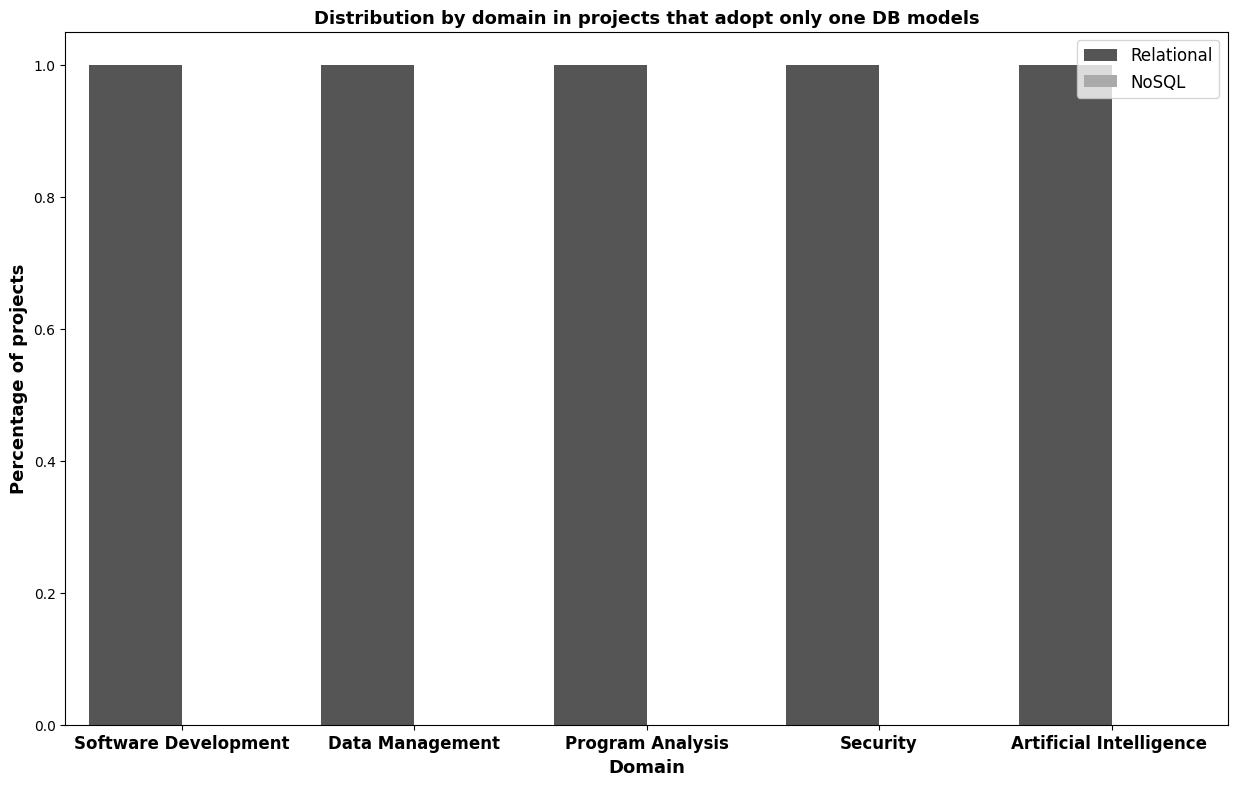

In [32]:
fig = plt.figure(figsize= (15, 9))
graph_most_frequentsS = sns.barplot(data= most_frequentsS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsS.set_xticklabels(most_frequentsS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.legend(fontsize = 12)
graph_most_frequentsS.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

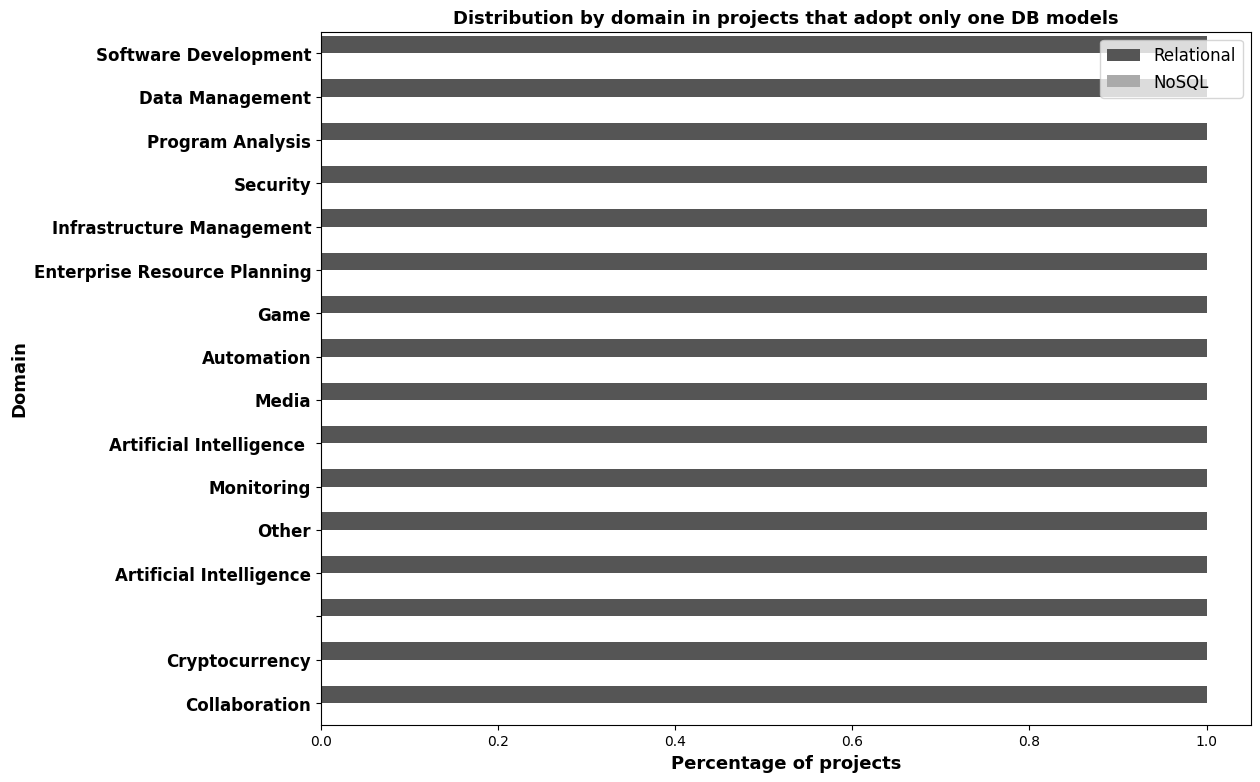

In [33]:
fig = plt.figure(figsize= (12, 9))
graph_single_model = sns.barplot(data= single_model.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_single_model.set_yticklabels(single_model['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_single_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_single_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_single_model.legend(fontsize = 12)
graph_single_model.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

In [34]:
# fig = plt.figure(figsize= (12, 8))
# x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
# domain_perfil = sns.barplot(data=table.melt(id_vars='Domain',
#                                   value_name='Amount of projects', var_name='Model'),
#             x='Domain', y='Amount of projects', hue='Model', palette='gray')
# domain_perfil.set_yticks(x)
# domain_perfil.set_xticklabels(table['Domain'],rotation = 90, fontsize = 14, fontname = 'Times New Roman', fontweight = 'bold')
# domain_perfil.set_yticklabels(x, fontsize = 12)
# domain_perfil.set_xlabel("Domain",fontsize = 13)
# domain_perfil.set_ylabel("Amount of projects",fontsize = 13)
# domain_perfil.legend(fontsize = 12)
# domain_perfil.set_title("Distribution of projects per Domain", fontsize = 15, fontname = 'Times New Roman', fontweight = 'bold')

Text(0, 0.5, 'Domain')

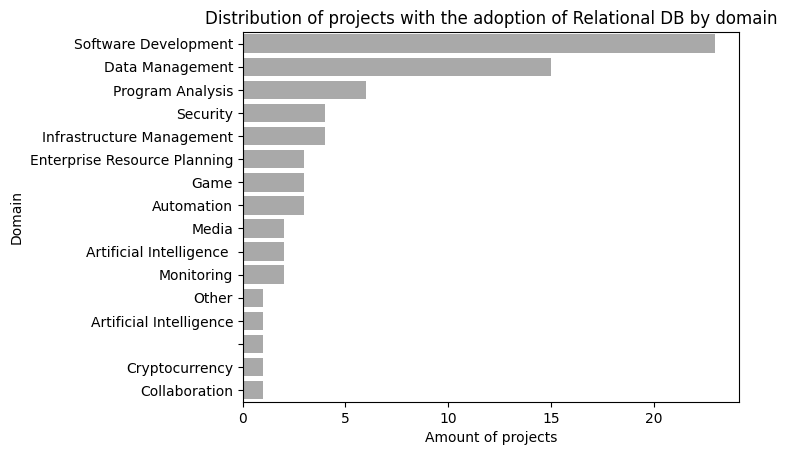

In [35]:
relational = sns.barplot(y=selecaoR['index'], x = selecaoR['domain'], color= 'darkgray')
relational.set_title("Distribution of projects with the adoption of Relational DB by domain")
relational.set_yticklabels(selecaoR['index'])
relational.set_xlabel('Amount of projects')
relational.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

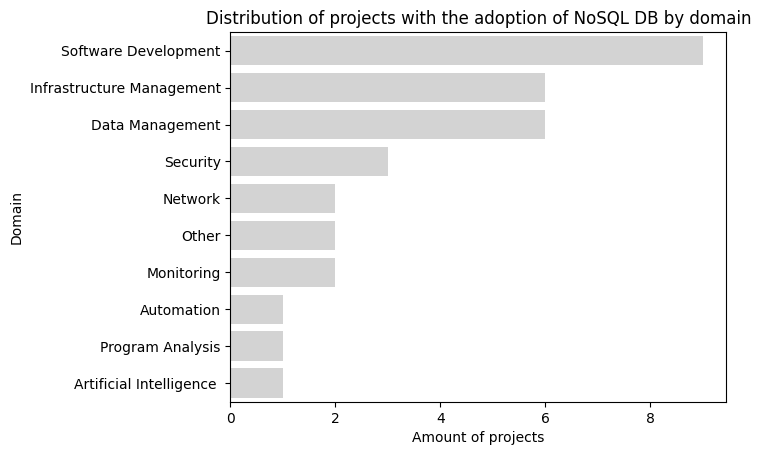

In [36]:
y = [0, 2, 4, 6, 8]
NoSQL = sns.barplot(y = selecaoNR['index'], x = selecaoNR['domain'], color= 'lightgray')
NoSQL.set_title("Distribution of projects with the adoption of NoSQL DB by domain")
NoSQL.set_xticks(y)
NoSQL.set_xlabel('Amount of projects')
NoSQL.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

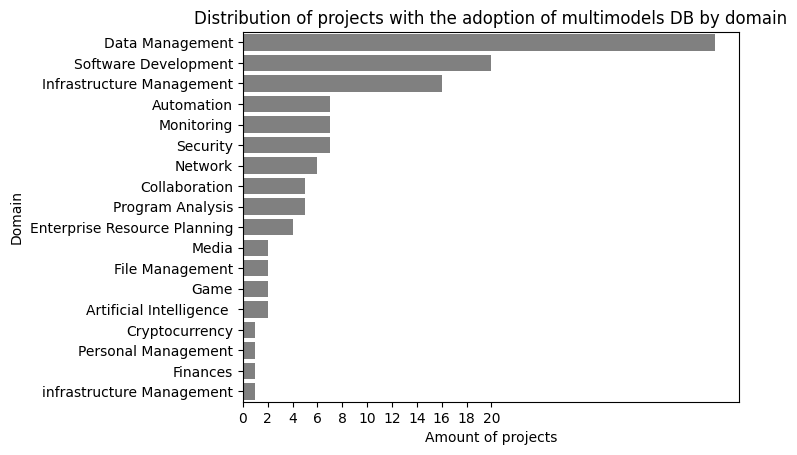

In [37]:
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
multimodel = sns.barplot(x=selecaoM['domain'], y = selecaoM['index'], color= 'gray')
multimodel.set_title("Distribution of projects with the adoption of multimodels DB by domain")
multimodel.set_xticks(x)
multimodel.set_xlabel('Amount of projects')
multimodel.set_ylabel('Domain')